In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

#          || **  Ignore my English grammar and spelling mistske ** || (-_-)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/"))
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Any results you write to the current directory are saved as output.

['USA_Housing.csv']


Using TensorFlow backend.


In [2]:
data= pd.read_csv("../input/USA_Housing.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [4]:
print('check if any null value:- \n', (data.isnull().sum()))


check if any null value:- 
 Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


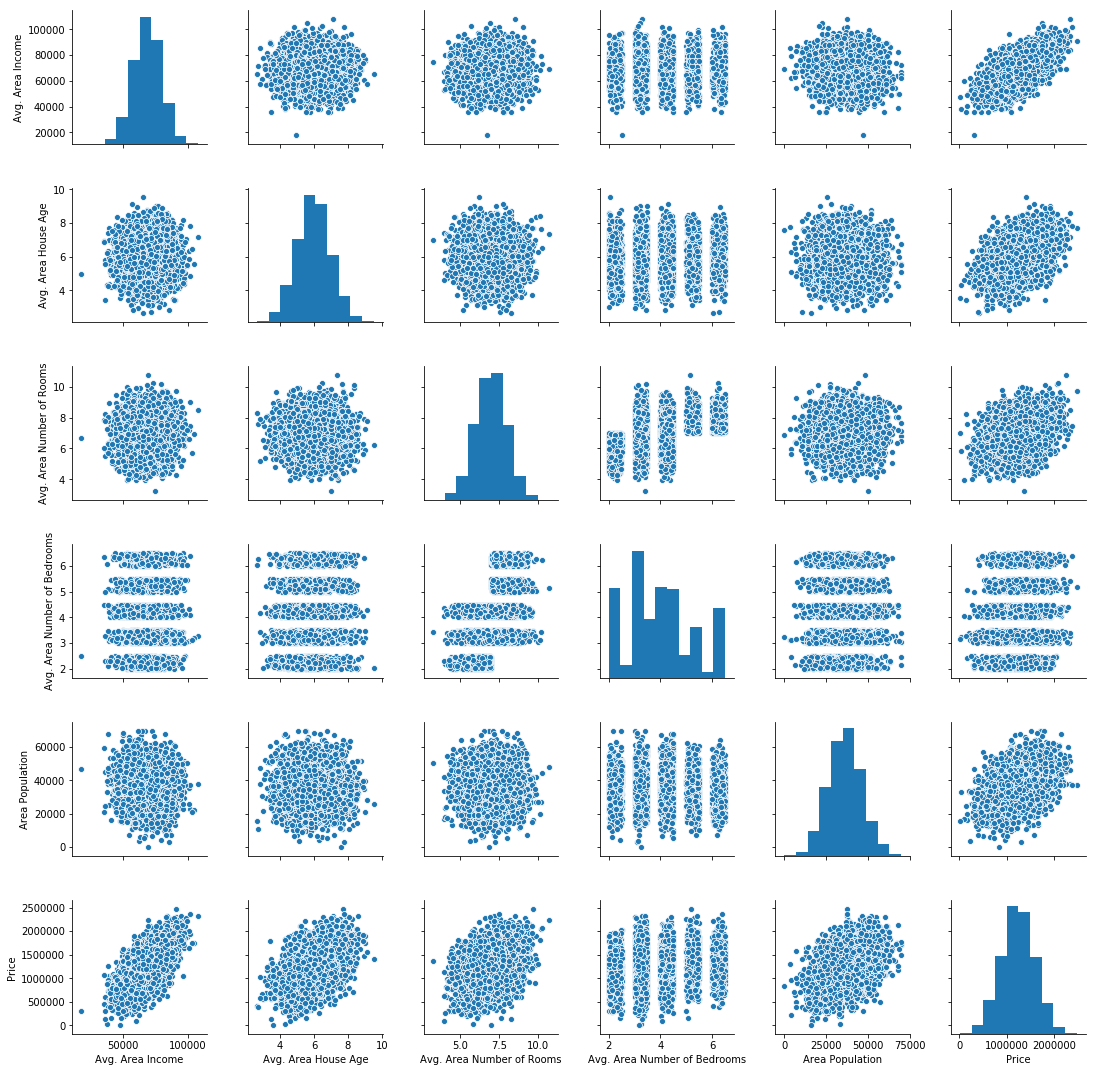

In [5]:
sns.pairplot(data)

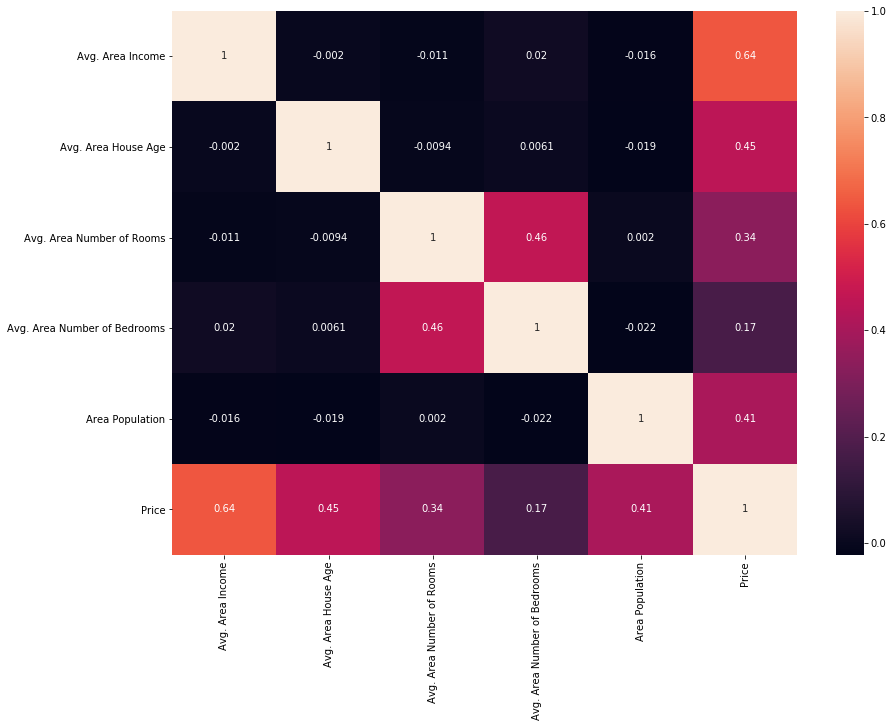

In [6]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True)

In [7]:
# address is not seem to useful so we can delete this column:-
# we devide the data into dependent veriable and independent veriable(where X is independent veriable and y is dependent veriable)

X= data.drop(['Address','Price'], axis=1)
y= data['Price']

In [8]:
#using Standard Scaler we sacle the independent veriables data:-

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X= scaler.transform(X)


In [9]:
print(X)

[[ 1.02865969 -0.29692705  0.02127433  0.08806222 -1.31759867]
 [ 1.00080775  0.02590164 -0.25550611 -0.72230146  0.40399945]
 [-0.68462916 -0.11230283  1.5162435   0.93084045  0.07240989]
 ...
 [-0.48723454  1.28447022 -2.17026949 -1.50025059 -0.29193658]
 [-0.05459152 -0.44669439  0.14154061  1.18205319  0.65111608]
 [-0.28831272  0.01521477 -0.19434166  0.07185495  1.04162464]]


In [10]:
#splitting the data into trainning and testing sets:-

from sklearn.model_selection import train_test_split
X_train,  X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
#Apply linear regression to our model :- 

from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
#Now we can see  the output of 1st row of our data and compare actual price value  to the predicted price value 

y_predict= regressor.predict(X_test)
print('Predicted Value :',y_predict[0])
print('Actual Value :',y_test.values[0])


Predicted Value : 971305.2171558854
Actual Value : 894251.0686357756


In [13]:
test = pd.DataFrame({'Predicted':y_predict,'Actual':y_test})
test = test.reset_index()
test = test.drop(['index'],axis=1)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


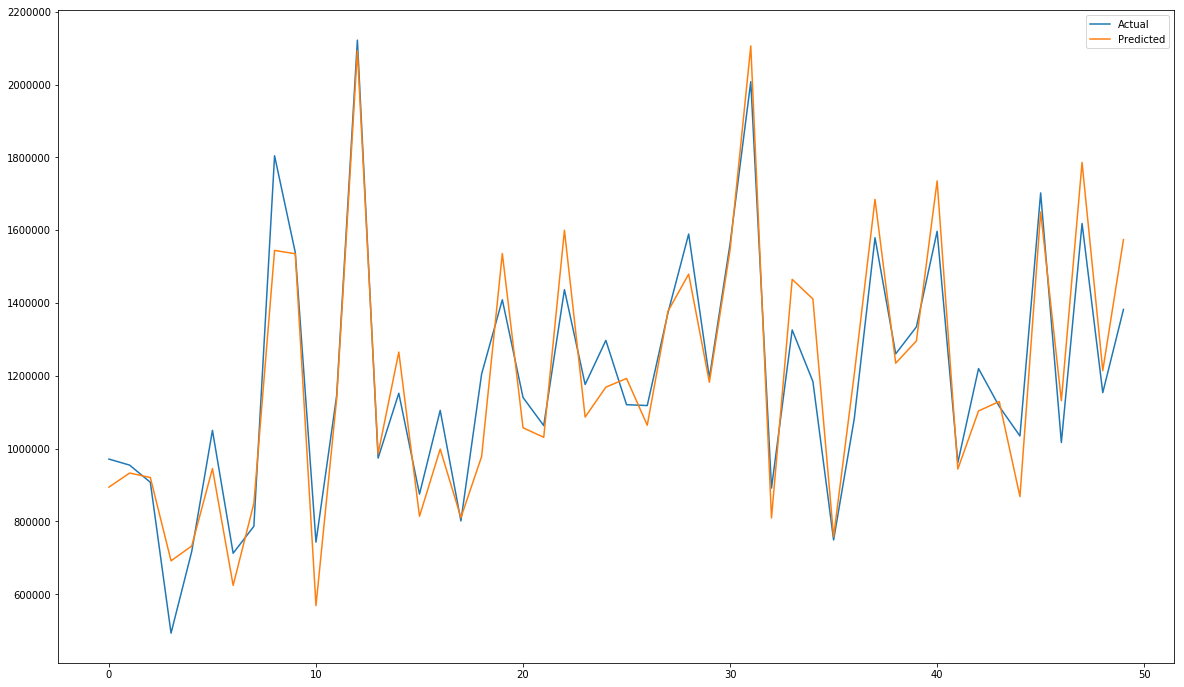

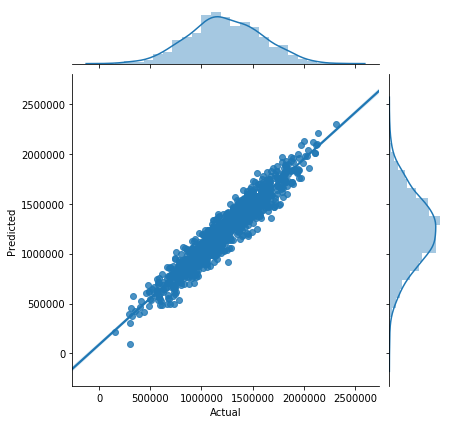

In [14]:
# Graph is output of first 50 test datasets  and its predicted value :-


plt.figure(figsize=(20,12))
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg')

In [15]:
from sklearn.metrics import r2_score, mean_squared_error

score = r2_score(regressor.predict(X_train), y_train)
error = mean_squared_error(regressor.predict(X_train), y_train)

In [16]:
print(score,error)

0.9116713727835761 10139634425.106672


In [17]:
regressor.coef_

array([230833.35479062, 164376.56318493, 121019.21340588,   2706.31030873,
       151707.17771801])

In [18]:
Z= data.drop(['Address'], axis=1)
Z

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06


In [19]:
pd.DataFrame(regressor.coef_, index=Z.columns[:-1], columns=['Values'])

,Values
Avg. Area Income,230833.354791
Avg. Area House Age,164376.563185
Avg. Area Number of Rooms,121019.213406
Avg. Area Number of Bedrooms,2706.310309
Area Population,151707.177718


In [20]:
score_test = r2_score(regressor.predict(X_test),y_test)
print(score_test)

0.9094828864191535


In [26]:
LR_mse = mean_squared_error(y_test, y_predict)
LR_rmse = np.sqrt(LR_mse)
LR_rmse

102711.83810135555

In [21]:
DNN_regressor = Sequential()
DNN_regressor.add(Dense(output_dim = 128, init = 'uniform', activation = 'relu', input_dim = 5))
DNN_regressor.add(Dense(output_dim = 64, init = 'uniform', activation='relu'))
DNN_regressor.add(Dense(output_dim = 32, init = 'uniform', activation='relu'))
DNN_regressor.add(Dense(output_dim = 16, init = 'uniform', activation='relu'))
DNN_regressor.add(Dense(output_dim = 8, init = 'uniform', activation='relu'))
DNN_regressor.add(Dense(output_dim = 4, init = 'uniform', activation='relu'))
DNN_regressor.add(Dense(output_dim = 1, init = 'uniform', activation='linear'))

DNN_regressor.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
DNN_regressor.fit(X_train, y_train, epochs=100, batch_size=10)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=5, units=128, kernel_initializer="uniform")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` ca

Epoch 1/100
4000/4000 [==============================] - 1s 309us/step - loss: 1015396410547.2000 - acc: 0.0000e+00
Epoch 2/100
4000/4000 [==============================] - 1s 141us/step - loss: 20572984090.8800 - acc: 0.0000e+00
Epoch 3/100
4000/4000 [==============================] - 1s 141us/step - loss: 13461439773.4400 - acc: 0.0000e+00
Epoch 4/100
4000/4000 [==============================] - 1s 143us/step - loss: 11749767397.1200 - acc: 0.0000e+00
Epoch 5/100
4000/4000 [==============================] - 1s 143us/step - loss: 11136950238.0800 - acc: 0.0000e+00
Epoch 6/100
4000/4000 [==============================] - 1s 139us/step - loss: 10859940258.2400 - acc: 0.0000e+00
Epoch 7/100
4000/4000 [==============================] - 1s 141us/step - loss: 10831967367.0400 - acc: 0.0000e+00
Epoch 8/100
4000/4000 [==============================] - 1s 139us/step - loss: 10599935921.9200 - acc: 0.0000e+00
Epoch 9/100
4000/4000 [==============================] - 1s 140us/step - loss: 1052672

4000/4000 [==============================] - 1s 148us/step - loss: 10409693442.2400 - acc: 0.0000e+00
Epoch 73/100
4000/4000 [==============================] - 1s 140us/step - loss: 10416233944.6400 - acc: 0.0000e+00
Epoch 74/100
4000/4000 [==============================] - 1s 144us/step - loss: 10360696910.0800 - acc: 0.0000e+00
Epoch 75/100
4000/4000 [==============================] - 1s 149us/step - loss: 10402035194.8800 - acc: 0.0000e+00
Epoch 76/100
4000/4000 [==============================] - 1s 144us/step - loss: 10363306887.3600 - acc: 0.0000e+00
Epoch 77/100
4000/4000 [==============================] - 1s 148us/step - loss: 10420175135.3600 - acc: 0.0000e+00
Epoch 78/100
4000/4000 [==============================] - 1s 144us/step - loss: 10423635606.4000 - acc: 0.0000e+00
Epoch 79/100
4000/4000 [==============================] - 1s 143us/step - loss: 10314541170.5600 - acc: 0.0000e+00
Epoch 80/100
4000/4000 [==============================] - 1s 149us/step - loss: 10406072341.6

In [22]:
y_pred_DNN = DNN_regressor.predict(X_test)

In [24]:
DNN_mse = mean_squared_error(y_test, y_pred_DNN)
DNN_rmse = np.sqrt(DNN_mse)
DNN_rmse

105218.65629668358